In [1]:
import pandas as pd

## Reading data

In [3]:
lsh_knn_in_category = pd.read_csv('/Users/leshensui/Documents/lsh_knn_test_in_category.csv',index_col='Unnamed: 0')
lsh_knn_cross_category = pd.read_csv('/Users/leshensui/Documents/knn_test_cross_category.csv',index_col='Unnamed: 0')

In [4]:
lsh_knn_in_category.head()

,asin,reviewer,star_rating,predicted_star_rating
506872,B00AHJL7BK,AUZT1BKOT0MJZ,5,4.721125
506874,B00AHJL7BK,A3AFWRNSCECGZQ,5,5.000000
506875,B00AHJL7BK,A25V3I11KU10YC,5,3.697503
506879,B00AHJL7BK,AGGY7B27PT3S4,4,1.815086
506880,B00AHJL7BK,AV2AVZYXM9VQU,5,5.000000


In [6]:
lsh_knn_cross_category.head()

,asin,rating,cluster,predicted_star_rating
0,A1KQ9NR16ZQUTA,5.0,cluster83,4.076354
1,A1KQAQGN60CN8W,4.0,cluster83,4.759733
2,A1KQJXO8H4U02V,4.0,cluster83,5.000000
3,A1KVS0QHQQC65S,2.5,cluster83,1.000000
4,A1KYRCK3TJP81P,3.0,cluster83,4.061561


In [37]:
fm_cross_category = pd.read_csv('/Users/leshensui/Documents/mf_test_cross_category.csv', index_col='Unnamed: 0')
fm_in_category = pd.read_csv('/Users/leshensui/Documents/mf_test_in_category.csv', index_col='Unnamed: 0')

In [38]:
fm_cross_category.head()

,asin,rating,cluster,predicted_star_rating
0,A1KQ9NR16ZQUTA,5.0,cluster83,4.654613
1,A1KQAQGN60CN8W,4.0,cluster83,5.000000
2,A1KQJXO8H4U02V,4.0,cluster83,3.311869
3,A1KVS0QHQQC65S,2.5,cluster83,1.584166
4,A1KYRCK3TJP81P,3.0,cluster83,1.747179


In [39]:
fm_in_category.head()

,asin,reviewer,star_rating,predicted_star_rating
506872,B00AHJL7BK,AUZT1BKOT0MJZ,5,4.435138
506874,B00AHJL7BK,A3AFWRNSCECGZQ,5,3.219350
506875,B00AHJL7BK,A25V3I11KU10YC,5,5.000000
506879,B00AHJL7BK,AGGY7B27PT3S4,4,2.781746
506880,B00AHJL7BK,AV2AVZYXM9VQU,5,4.340321


In [23]:
pmf_cross_category = pd.read_csv('/Users/leshensui/Documents/pmf_test_cross_category.csv',index_col='Unnamed: 0')
pmf_in_category = pd.read_csv('/Users/leshensui/Documents/pmf_test_in_category.csv',index_col='Unnamed: 0')

In [24]:
pmf_cross_category.head()

,asin,rating,cluster,predicted_star_rating
0,A1KQ9NR16ZQUTA,5.0,cluster83,3.796796
1,A1KQAQGN60CN8W,4.0,cluster83,3.248944
2,A1KQJXO8H4U02V,4.0,cluster83,2.272191
3,A1KVS0QHQQC65S,2.5,cluster83,5.000000
4,A1KYRCK3TJP81P,3.0,cluster83,1.000000


In [25]:
pmf_in_category.head()

,asin,reviewer,star_rating,predicted_star_rating
506872,B00AHJL7BK,AUZT1BKOT0MJZ,5,1.491414
506874,B00AHJL7BK,A3AFWRNSCECGZQ,5,4.534819
506875,B00AHJL7BK,A25V3I11KU10YC,5,5.000000
506879,B00AHJL7BK,AGGY7B27PT3S4,4,5.000000
506880,B00AHJL7BK,AV2AVZYXM9VQU,5,5.000000


## Hybrid models

First, predict star rating by averaging predicted values from 3 models:

In [51]:
from sklearn.metrics import mean_squared_error

def computeMSE(test_df, true, predicted):
    return mean_squared_error(test_df[true], test_df[predicted])

In [50]:
knn_in = lsh_knn_in_category['predicted_star_rating'].values.tolist()
knn_cross = lsh_knn_cross_category['predicted_star_rating'].values.tolist()
fm_in = fm_in_category['predicted_star_rating'].values.tolist()
fm_cross = fm_cross_category['predicted_star_rating'].values.tolist()
pmf_cross = pmf_cross_category['predicted_star_rating'].values.tolist()
pmf_in = pmf_in_category['predicted_star_rating'].values.tolist()

In [62]:
average_in = []
for i in range(len(knn_in)):
    average_in.append(sum([knn_in[i], fm_in[i], pmf_in[i]])/3.0)
mean_squared_error(pmf_in_category['star_rating'].values.tolist(), average_in)

0.6208419357400996

In [63]:
average_cross = []
for i in range(len(knn_cross)):
    average_cross.append(sum([knn_cross[i], fm_cross[i], pmf_cross[i]])/3.0)
mean_squared_error(pmf_cross_category['rating'].values.tolist(), average_cross)

0.70689193349817814

Then, predict star rating by weighted average result of three models, and the weight is inverse proportional to the MSE. Smaller weight is given for a model if it produce a larger MSE

In [46]:
pair_PMF = (computeMSE(pmf_cross_category, 'rating', 'predicted_star_rating'), computeMSE(pmf_in_category, 'star_rating', 'predicted_star_rating'))
pair_FM = (computeMSE(fm_cross_category, 'rating', 'predicted_star_rating'), computeMSE(fm_in_category, 'star_rating', 'predicted_star_rating'))
pair_KNN = (computeMSE(lsh_knn_cross_category, 'rating', 'predicted_star_rating'), computeMSE(lsh_knn_in_category, 'star_rating', 'predicted_star_rating'))

In [44]:
pair_PMF

(1.3624306995623328, 1.1399043455569755)

In [47]:
pair_FM

(1.5889863154633381, 1.2072096277920572)

In [48]:
pair_KNN

(1.6238693117910428, 1.9163535577098219)

In [ ]:
def compute_weight(MSE1, MSE2, MSE3):
    weight1 = (1/MSE1)/(1/MSE1 + 1/MSE2 + 1/MSE3)
    weight2 = (1/MSE2)/(1/MSE1 + 1/MSE2 + 1/MSE3)
    weight3 = (1/MSE3)/(1/MSE1 + 1/MSE2 + 1/MSE3)
    return weight1, weight2, weight3

In [58]:
weight_cross = compute_weight(pair_PMF[0], pair_FM[0], pair_KNN[0])
weight_in = compute_weight(pair_PMF[1], pair_FM[1], pair_KNN[1])

In [61]:
weighted_average_in = []
for i in range(len(knn_in)):
    weighted_average_in.append(weight_in[0]*pmf_in[i]+weight_in[1]*fm_in[i]+weight_in[2]*knn_in[i])
mean_squared_error(pmf_in_category['star_rating'].values.tolist(), weighted_average_in)

0.5866853897342823

In [65]:
weighted_average_cross = []
for i in range(len(knn_cross)):
    weighted_average_cross.append(weight_cross[0]*pmf_cross[i]+weight_cross[1]*fm_cross[i]+weight_cross[2]*knn_cross[i])
mean_squared_error(pmf_cross_category['rating'].values.tolist(), weighted_average_cross)

0.7022482732216706

In [67]:
pair_weighted_Average = (mean_squared_error(pmf_cross_category['rating'].values.tolist(), weighted_average_cross), mean_squared_error(pmf_in_category['star_rating'].values.tolist(), weighted_average_in))
pair_Average = (mean_squared_error(pmf_cross_category['rating'].values.tolist(), average_cross), mean_squared_error(pmf_in_category['star_rating'].values.tolist(), average_in))
print (pair_weighted_Average)
print (pair_Average)

(0.7022482732216706, 0.5866853897342823)
(0.70689193349817814, 0.6208419357400996)


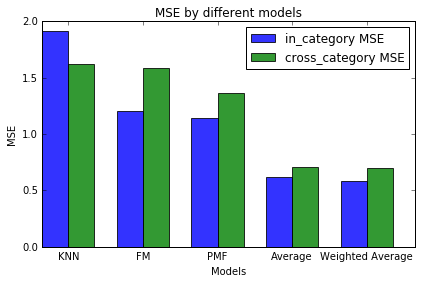

In [70]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# data to plot
n_groups = 5
predicted_in = (pair_KNN[1], pair_FM[1], pair_PMF[1], pair_Average[1], pair_weighted_Average[1])
predicted_cross = (pair_KNN[0], pair_FM[0], pair_PMF[0], pair_Average[0], pair_weighted_Average[0])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, predicted_in, bar_width,
                 alpha=opacity,
                 color='b',
                 label='in_category MSE')
 
rects2 = plt.bar(index + bar_width, predicted_cross, bar_width,
                 alpha=opacity,
                 color='g',
                 label='cross_category MSE')
 
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE by different models')
plt.xticks(index + bar_width, ('KNN', 'FM', 'PMF', 'Average', 'Weighted Average'))
plt.legend()
 
plt.tight_layout()
plt.show()